                  Date                   Mode        Category  \
0  20/09/2018 12:04:08                   Cash  Transportation   
1  20/09/2018 12:03:15                   Cash            Food   
2           19/09/2018  Saving Bank account 1    subscription   
3  17/09/2018 23:41:17  Saving Bank account 1    subscription   
4  16/09/2018 17:15:08                   Cash       Festivals   

               Subcategory                         Note  Amount  \
0                    Train         2 Place 5 to Place 0    30.0   
1                   snacks  Idli medu Vada mix 2 plates    60.0   
2                  Netflix         1 month subscription   199.0   
3  Mobile Service Provider            Data booster pack    19.0   
4             Ganesh Pujan                  Ganesh idol   251.0   

  Income/Expense Currency  
0        Expense      INR  
1        Expense      INR  
2        Expense      INR  
3        Expense      INR  
4        Expense      INR  
                                Date  

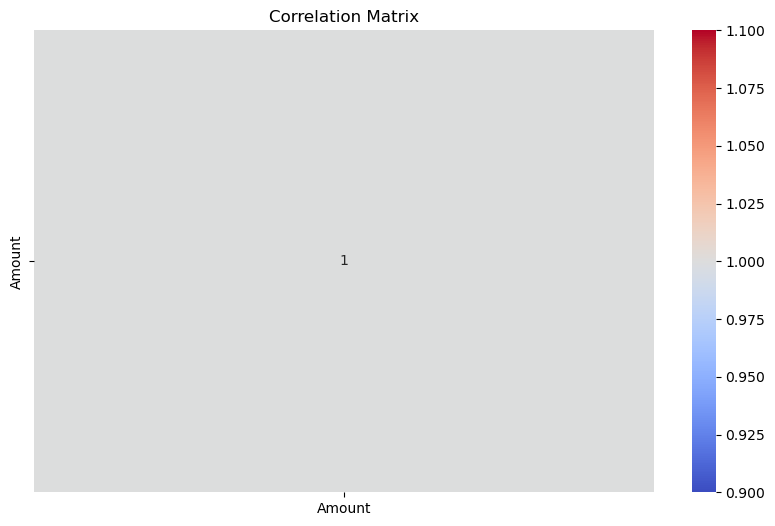

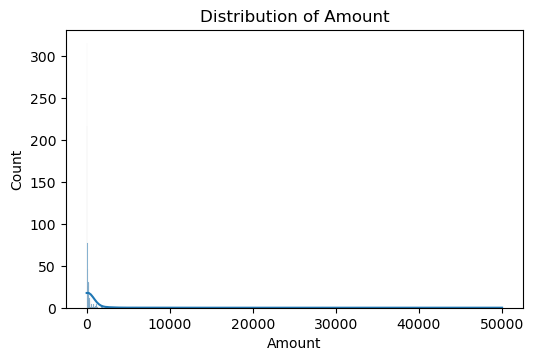

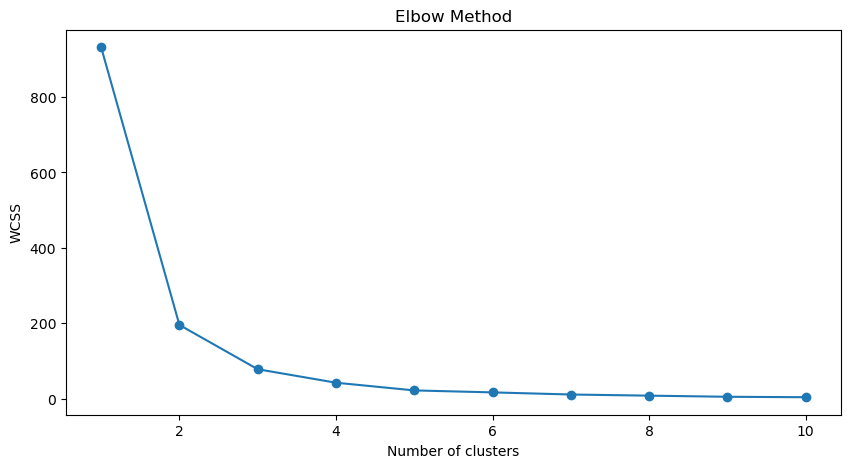

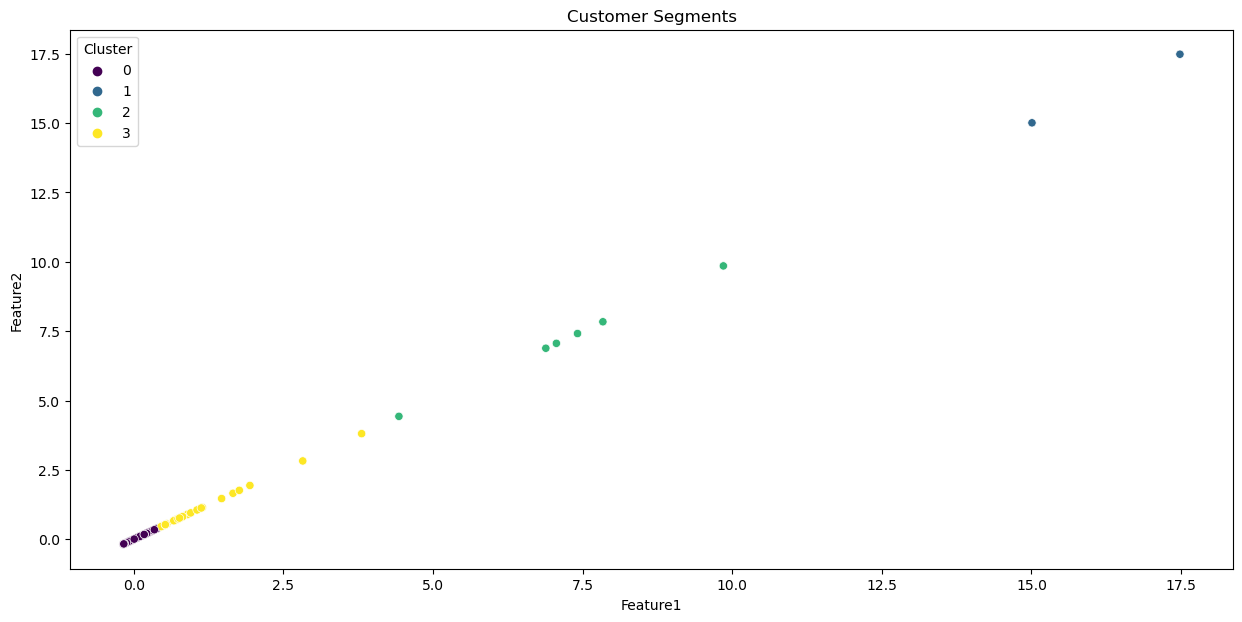

In [6]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('Daily Household Transactions.csv')

# Display the first few rows of the dataset
print(df.head())

# Data Cleaning and Preprocessing
df.dropna(inplace=True)

# Remove any duplicate rows
df.drop_duplicates(inplace=True)

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

# Drop rows with invalid date formats
df.dropna(subset=['Date'], inplace=True)

# Convert categorical variables to numerical if necessary
# Example: converting 'Mode' and 'Category' columns to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['Mode', 'Category', 'Subcategory', 'Income/Expense', 'Currency'], drop_first=True)

# Exploratory Data Analysis (EDA)
# Basic statistics
print(df.describe())

# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Distribution of key features
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.select_dtypes(include=[np.number]).columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Clustering using K-means
features = df[['Amount']] 
# Replace with relevant feature columns

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# From the elbow plot, choose the optimal number of clusters (e.g., k=4)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)

# Visualization of customer segments
plt.figure(figsize=(15, 7))
sns.scatterplot(x=features_scaled[:, 0], y=features_scaled[:, 0], hue=df['Cluster'], palette='viridis')
plt.title('Customer Segments')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.show()

# Save the clustered data to a new CSV file
df.to_csv('segmentedCustomers.csv', index=False)
